In [2]:
from sklearn.model_selection import cross_val_score, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns 
import pandas as pd 
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# load dataset 
data = pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
# first two columns present in 
# datset in encoded form 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
# no null values present 
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
# not including first 2 columns of original dataset 
# first five features are continuous 
# and remaining features are in encoded form 
X = data.iloc[:,2:-1]
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# features with continuous data
X.iloc[:,:9].head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
# normalizing feature data 
scaler = MinMaxScaler(feature_range=(0,1))
normX = pd.DataFrame(scaler.fit_transform(X),
                     columns=X.columns)
normX.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# 28 features
# 517 observations present 
normX.shape

(517, 28)

In [10]:
# target 'size' data
Y = data[['size_category']]
print(Y.value_counts())
Y.head()

size_category
small            378
large            139
dtype: int64


,size_category
0,small
1,small
2,small
3,small
4,small


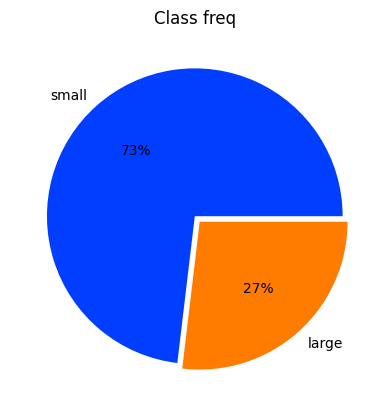

In [11]:
# target contains 2 unique classes
# there is imbalance in target data 
# don't rely on accuracy for model evaluation 
n = Y.value_counts()
explode = [0,0.05]
plt.pie(n.values,labels=[i[0] for i in n.index],explode=explode,
        colors=sns.color_palette('bright'),autopct='%.0f%%')
plt.title('Class freq')
plt.show()

In [12]:
# LabelEncoding transform on target 
enc = LabelEncoder()
# small -> 1 and Large -> 0
encY = enc.fit_transform(Y.values.ravel())
encY = pd.DataFrame(encY,columns=['Enc. target class'])
encY.head()

,Enc. target class
0,1
1,1
2,1
3,1
4,1


In [13]:
# hyperparameter tuning of SVC
clf = SVC(random_state=42)
param_grid = [{'kernel':['linear','rbf','sigmoid'],   # kernel params 
               'gamma':[0.1,0.001,1,5,10,25],         # gamma params
               'C':[0.1,0.01,2,8,15,20]}]             # C params
grid = GridSearchCV(clf,param_grid,cv=20,verbose=10)
grid.fit(normX.values,encY.values.ravel())

Fitting 20 folds for each of 108 candidates, totalling 2160 fits
[CV 1/20; 1/108] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 1/20; 1/108] END C=0.1, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 2/20; 1/108] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 2/20; 1/108] END C=0.1, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 3/20; 1/108] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 3/20; 1/108] END C=0.1, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 4/20; 1/108] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 4/20; 1/108] END C=0.1, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 5/20; 1/108] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 5/20; 1/108] END C=0.1, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 6/20; 1/108] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 6/20; 1/108] EN

[CV 10/20; 3/108] END C=0.1, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 11/20; 3/108] START C=0.1, gamma=0.1, kernel=sigmoid........................
[CV 11/20; 3/108] END C=0.1, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 12/20; 3/108] START C=0.1, gamma=0.1, kernel=sigmoid........................
[CV 12/20; 3/108] END C=0.1, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 13/20; 3/108] START C=0.1, gamma=0.1, kernel=sigmoid........................
[CV 13/20; 3/108] END C=0.1, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 14/20; 3/108] START C=0.1, gamma=0.1, kernel=sigmoid........................
[CV 14/20; 3/108] END C=0.1, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 15/20; 3/108] START C=0.1, gamma=0.1, kernel=sigmoid........................
[CV 15/20; 3/108] END C=0.1, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 16/20; 3/108] START C=0.1, gamma=0.1, kernel=sigmoid...........

[CV 20/20; 5/108] END C=0.1, gamma=0.001, kernel=rbf;, score=0.720 total time=   0.0s
[CV 1/20; 6/108] START C=0.1, gamma=0.001, kernel=sigmoid.......................
[CV 1/20; 6/108] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 2/20; 6/108] START C=0.1, gamma=0.001, kernel=sigmoid.......................
[CV 2/20; 6/108] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 3/20; 6/108] START C=0.1, gamma=0.001, kernel=sigmoid.......................
[CV 3/20; 6/108] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 4/20; 6/108] START C=0.1, gamma=0.001, kernel=sigmoid.......................
[CV 4/20; 6/108] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 5/20; 6/108] START C=0.1, gamma=0.001, kernel=sigmoid.......................
[CV 5/20; 6/108] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 6/20; 6/108] START C=0.1, gamma=0.001, kernel=sigmoid.......

[CV 10/20; 8/108] END C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 11/20; 8/108] START C=0.1, gamma=1, kernel=rbf..............................
[CV 11/20; 8/108] END C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 12/20; 8/108] START C=0.1, gamma=1, kernel=rbf..............................
[CV 12/20; 8/108] END C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 13/20; 8/108] START C=0.1, gamma=1, kernel=rbf..............................
[CV 13/20; 8/108] END C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 14/20; 8/108] START C=0.1, gamma=1, kernel=rbf..............................
[CV 14/20; 8/108] END C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 15/20; 8/108] START C=0.1, gamma=1, kernel=rbf..............................
[CV 15/20; 8/108] END C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 16/20; 8/108] START C=0.1, gamma=1, kernel=rbf..............................
[CV 16/20; 8/108] END 

[CV 2/20; 11/108] END C=0.1, gamma=5, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/20; 11/108] START C=0.1, gamma=5, kernel=rbf..............................
[CV 3/20; 11/108] END C=0.1, gamma=5, kernel=rbf;, score=0.731 total time=   0.0s
[CV 4/20; 11/108] START C=0.1, gamma=5, kernel=rbf..............................
[CV 4/20; 11/108] END C=0.1, gamma=5, kernel=rbf;, score=0.731 total time=   0.0s
[CV 5/20; 11/108] START C=0.1, gamma=5, kernel=rbf..............................
[CV 5/20; 11/108] END C=0.1, gamma=5, kernel=rbf;, score=0.731 total time=   0.0s
[CV 6/20; 11/108] START C=0.1, gamma=5, kernel=rbf..............................
[CV 6/20; 11/108] END C=0.1, gamma=5, kernel=rbf;, score=0.731 total time=   0.0s
[CV 7/20; 11/108] START C=0.1, gamma=5, kernel=rbf..............................
[CV 7/20; 11/108] END C=0.1, gamma=5, kernel=rbf;, score=0.731 total time=   0.0s
[CV 8/20; 11/108] START C=0.1, gamma=5, kernel=rbf..............................
[CV 8/20; 11/108] END 

[CV 17/20; 13/108] END C=0.1, gamma=10, kernel=linear;, score=0.731 total time=   0.0s
[CV 18/20; 13/108] START C=0.1, gamma=10, kernel=linear.........................
[CV 18/20; 13/108] END C=0.1, gamma=10, kernel=linear;, score=0.760 total time=   0.0s
[CV 19/20; 13/108] START C=0.1, gamma=10, kernel=linear.........................
[CV 19/20; 13/108] END C=0.1, gamma=10, kernel=linear;, score=0.720 total time=   0.0s
[CV 20/20; 13/108] START C=0.1, gamma=10, kernel=linear.........................
[CV 20/20; 13/108] END C=0.1, gamma=10, kernel=linear;, score=0.720 total time=   0.0s
[CV 1/20; 14/108] START C=0.1, gamma=10, kernel=rbf.............................
[CV 1/20; 14/108] END C=0.1, gamma=10, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/20; 14/108] START C=0.1, gamma=10, kernel=rbf.............................
[CV 2/20; 14/108] END C=0.1, gamma=10, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/20; 14/108] START C=0.1, gamma=10, kernel=rbf.............................


[CV 12/20; 16/108] END C=0.1, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 13/20; 16/108] START C=0.1, gamma=25, kernel=linear.........................
[CV 13/20; 16/108] END C=0.1, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 14/20; 16/108] START C=0.1, gamma=25, kernel=linear.........................
[CV 14/20; 16/108] END C=0.1, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 15/20; 16/108] START C=0.1, gamma=25, kernel=linear.........................
[CV 15/20; 16/108] END C=0.1, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 16/20; 16/108] START C=0.1, gamma=25, kernel=linear.........................
[CV 16/20; 16/108] END C=0.1, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 17/20; 16/108] START C=0.1, gamma=25, kernel=linear.........................
[CV 17/20; 16/108] END C=0.1, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 18/20; 16/108] START C=0.1, gamma=25, kernel=linear..................

[CV 5/20; 19/108] END C=0.01, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 6/20; 19/108] START C=0.01, gamma=0.1, kernel=linear........................
[CV 6/20; 19/108] END C=0.01, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 7/20; 19/108] START C=0.01, gamma=0.1, kernel=linear........................
[CV 7/20; 19/108] END C=0.01, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 8/20; 19/108] START C=0.01, gamma=0.1, kernel=linear........................
[CV 8/20; 19/108] END C=0.01, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 9/20; 19/108] START C=0.01, gamma=0.1, kernel=linear........................
[CV 9/20; 19/108] END C=0.01, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 10/20; 19/108] START C=0.01, gamma=0.1, kernel=linear.......................
[CV 10/20; 19/108] END C=0.01, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 11/20; 19/108] START C=0.01, gamma=0.1, kernel=linear.........

[CV 17/20; 21/108] END C=0.01, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 18/20; 21/108] START C=0.01, gamma=0.1, kernel=sigmoid......................
[CV 18/20; 21/108] END C=0.01, gamma=0.1, kernel=sigmoid;, score=0.760 total time=   0.0s
[CV 19/20; 21/108] START C=0.01, gamma=0.1, kernel=sigmoid......................
[CV 19/20; 21/108] END C=0.01, gamma=0.1, kernel=sigmoid;, score=0.720 total time=   0.0s
[CV 20/20; 21/108] START C=0.01, gamma=0.1, kernel=sigmoid......................
[CV 20/20; 21/108] END C=0.01, gamma=0.1, kernel=sigmoid;, score=0.720 total time=   0.0s
[CV 1/20; 22/108] START C=0.01, gamma=0.001, kernel=linear......................
[CV 1/20; 22/108] END C=0.01, gamma=0.001, kernel=linear;, score=0.731 total time=   0.0s
[CV 2/20; 22/108] START C=0.01, gamma=0.001, kernel=linear......................
[CV 2/20; 22/108] END C=0.01, gamma=0.001, kernel=linear;, score=0.731 total time=   0.0s
[CV 3/20; 22/108] START C=0.01, gamma=0.001, kernel=lin

[CV 10/20; 24/108] END C=0.01, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 11/20; 24/108] START C=0.01, gamma=0.001, kernel=sigmoid....................
[CV 11/20; 24/108] END C=0.01, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 12/20; 24/108] START C=0.01, gamma=0.001, kernel=sigmoid....................
[CV 12/20; 24/108] END C=0.01, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 13/20; 24/108] START C=0.01, gamma=0.001, kernel=sigmoid....................
[CV 13/20; 24/108] END C=0.01, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 14/20; 24/108] START C=0.01, gamma=0.001, kernel=sigmoid....................
[CV 14/20; 24/108] END C=0.01, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 15/20; 24/108] START C=0.01, gamma=0.001, kernel=sigmoid....................
[CV 15/20; 24/108] END C=0.01, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 16/20; 24/108] START C=0.01, gamma=0.00

[CV 2/20; 27/108] END C=0.01, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 3/20; 27/108] START C=0.01, gamma=1, kernel=sigmoid.........................
[CV 3/20; 27/108] END C=0.01, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 4/20; 27/108] START C=0.01, gamma=1, kernel=sigmoid.........................
[CV 4/20; 27/108] END C=0.01, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 5/20; 27/108] START C=0.01, gamma=1, kernel=sigmoid.........................
[CV 5/20; 27/108] END C=0.01, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 6/20; 27/108] START C=0.01, gamma=1, kernel=sigmoid.........................
[CV 6/20; 27/108] END C=0.01, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 7/20; 27/108] START C=0.01, gamma=1, kernel=sigmoid.........................
[CV 7/20; 27/108] END C=0.01, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 8/20; 27/108] START C=0.01, gamma=1, kernel=sigmoid..................

[CV 1/20; 30/108] END C=0.01, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 2/20; 30/108] START C=0.01, gamma=5, kernel=sigmoid.........................
[CV 2/20; 30/108] END C=0.01, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 3/20; 30/108] START C=0.01, gamma=5, kernel=sigmoid.........................
[CV 3/20; 30/108] END C=0.01, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 4/20; 30/108] START C=0.01, gamma=5, kernel=sigmoid.........................
[CV 4/20; 30/108] END C=0.01, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 5/20; 30/108] START C=0.01, gamma=5, kernel=sigmoid.........................
[CV 5/20; 30/108] END C=0.01, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 6/20; 30/108] START C=0.01, gamma=5, kernel=sigmoid.........................
[CV 6/20; 30/108] END C=0.01, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 7/20; 30/108] START C=0.01, gamma=5, kernel=sigmoid..................

[CV 11/20; 32/108] END C=0.01, gamma=10, kernel=rbf;, score=0.731 total time=   0.0s
[CV 12/20; 32/108] START C=0.01, gamma=10, kernel=rbf...........................
[CV 12/20; 32/108] END C=0.01, gamma=10, kernel=rbf;, score=0.731 total time=   0.0s
[CV 13/20; 32/108] START C=0.01, gamma=10, kernel=rbf...........................
[CV 13/20; 32/108] END C=0.01, gamma=10, kernel=rbf;, score=0.731 total time=   0.0s
[CV 14/20; 32/108] START C=0.01, gamma=10, kernel=rbf...........................
[CV 14/20; 32/108] END C=0.01, gamma=10, kernel=rbf;, score=0.731 total time=   0.0s
[CV 15/20; 32/108] START C=0.01, gamma=10, kernel=rbf...........................
[CV 15/20; 32/108] END C=0.01, gamma=10, kernel=rbf;, score=0.731 total time=   0.0s
[CV 16/20; 32/108] START C=0.01, gamma=10, kernel=rbf...........................
[CV 16/20; 32/108] END C=0.01, gamma=10, kernel=rbf;, score=0.731 total time=   0.0s
[CV 17/20; 32/108] START C=0.01, gamma=10, kernel=rbf...........................
[CV 

[CV 3/20; 35/108] END C=0.01, gamma=25, kernel=rbf;, score=0.731 total time=   0.0s
[CV 4/20; 35/108] START C=0.01, gamma=25, kernel=rbf............................
[CV 4/20; 35/108] END C=0.01, gamma=25, kernel=rbf;, score=0.731 total time=   0.0s
[CV 5/20; 35/108] START C=0.01, gamma=25, kernel=rbf............................
[CV 5/20; 35/108] END C=0.01, gamma=25, kernel=rbf;, score=0.731 total time=   0.0s
[CV 6/20; 35/108] START C=0.01, gamma=25, kernel=rbf............................
[CV 6/20; 35/108] END C=0.01, gamma=25, kernel=rbf;, score=0.731 total time=   0.0s
[CV 7/20; 35/108] START C=0.01, gamma=25, kernel=rbf............................
[CV 7/20; 35/108] END C=0.01, gamma=25, kernel=rbf;, score=0.731 total time=   0.0s
[CV 8/20; 35/108] START C=0.01, gamma=25, kernel=rbf............................
[CV 8/20; 35/108] END C=0.01, gamma=25, kernel=rbf;, score=0.731 total time=   0.0s
[CV 9/20; 35/108] START C=0.01, gamma=25, kernel=rbf............................
[CV 9/20; 

[CV 12/20; 37/108] END C=2, gamma=0.1, kernel=linear;, score=0.692 total time=   0.0s
[CV 13/20; 37/108] START C=2, gamma=0.1, kernel=linear..........................
[CV 13/20; 37/108] END C=2, gamma=0.1, kernel=linear;, score=0.692 total time=   0.0s
[CV 14/20; 37/108] START C=2, gamma=0.1, kernel=linear..........................
[CV 14/20; 37/108] END C=2, gamma=0.1, kernel=linear;, score=0.769 total time=   0.0s
[CV 15/20; 37/108] START C=2, gamma=0.1, kernel=linear..........................
[CV 15/20; 37/108] END C=2, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 16/20; 37/108] START C=2, gamma=0.1, kernel=linear..........................
[CV 16/20; 37/108] END C=2, gamma=0.1, kernel=linear;, score=0.808 total time=   0.0s
[CV 17/20; 37/108] START C=2, gamma=0.1, kernel=linear..........................
[CV 17/20; 37/108] END C=2, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 18/20; 37/108] START C=2, gamma=0.1, kernel=linear.........................

[CV 4/20; 40/108] END C=2, gamma=0.001, kernel=linear;, score=0.731 total time=   0.0s
[CV 5/20; 40/108] START C=2, gamma=0.001, kernel=linear.........................
[CV 5/20; 40/108] END C=2, gamma=0.001, kernel=linear;, score=0.731 total time=   0.0s
[CV 6/20; 40/108] START C=2, gamma=0.001, kernel=linear.........................
[CV 6/20; 40/108] END C=2, gamma=0.001, kernel=linear;, score=0.731 total time=   0.0s
[CV 7/20; 40/108] START C=2, gamma=0.001, kernel=linear.........................
[CV 7/20; 40/108] END C=2, gamma=0.001, kernel=linear;, score=0.731 total time=   0.0s
[CV 8/20; 40/108] START C=2, gamma=0.001, kernel=linear.........................
[CV 8/20; 40/108] END C=2, gamma=0.001, kernel=linear;, score=0.808 total time=   0.0s
[CV 9/20; 40/108] START C=2, gamma=0.001, kernel=linear.........................
[CV 9/20; 40/108] END C=2, gamma=0.001, kernel=linear;, score=0.769 total time=   0.0s
[CV 10/20; 40/108] START C=2, gamma=0.001, kernel=linear.................

[CV 20/20; 42/108] END C=2, gamma=0.001, kernel=sigmoid;, score=0.720 total time=   0.0s
[CV 1/20; 43/108] START C=2, gamma=1, kernel=linear.............................
[CV 1/20; 43/108] END C=2, gamma=1, kernel=linear;, score=0.731 total time=   0.0s
[CV 2/20; 43/108] START C=2, gamma=1, kernel=linear.............................
[CV 2/20; 43/108] END C=2, gamma=1, kernel=linear;, score=0.731 total time=   0.0s
[CV 3/20; 43/108] START C=2, gamma=1, kernel=linear.............................
[CV 3/20; 43/108] END C=2, gamma=1, kernel=linear;, score=0.731 total time=   0.0s
[CV 4/20; 43/108] START C=2, gamma=1, kernel=linear.............................
[CV 4/20; 43/108] END C=2, gamma=1, kernel=linear;, score=0.731 total time=   0.0s
[CV 5/20; 43/108] START C=2, gamma=1, kernel=linear.............................
[CV 5/20; 43/108] END C=2, gamma=1, kernel=linear;, score=0.731 total time=   0.0s
[CV 6/20; 43/108] START C=2, gamma=1, kernel=linear.............................
[CV 6/20; 

[CV 13/20; 45/108] END C=2, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 14/20; 45/108] START C=2, gamma=1, kernel=sigmoid...........................
[CV 14/20; 45/108] END C=2, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 15/20; 45/108] START C=2, gamma=1, kernel=sigmoid...........................
[CV 15/20; 45/108] END C=2, gamma=1, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 16/20; 45/108] START C=2, gamma=1, kernel=sigmoid...........................
[CV 16/20; 45/108] END C=2, gamma=1, kernel=sigmoid;, score=0.654 total time=   0.0s
[CV 17/20; 45/108] START C=2, gamma=1, kernel=sigmoid...........................
[CV 17/20; 45/108] END C=2, gamma=1, kernel=sigmoid;, score=0.654 total time=   0.0s
[CV 18/20; 45/108] START C=2, gamma=1, kernel=sigmoid...........................
[CV 18/20; 45/108] END C=2, gamma=1, kernel=sigmoid;, score=0.760 total time=   0.0s
[CV 19/20; 45/108] START C=2, gamma=1, kernel=sigmoid...........................
[CV 

[CV 8/20; 48/108] END C=2, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 9/20; 48/108] START C=2, gamma=5, kernel=sigmoid............................
[CV 9/20; 48/108] END C=2, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 10/20; 48/108] START C=2, gamma=5, kernel=sigmoid...........................
[CV 10/20; 48/108] END C=2, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 11/20; 48/108] START C=2, gamma=5, kernel=sigmoid...........................
[CV 11/20; 48/108] END C=2, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 12/20; 48/108] START C=2, gamma=5, kernel=sigmoid...........................
[CV 12/20; 48/108] END C=2, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 13/20; 48/108] START C=2, gamma=5, kernel=sigmoid...........................
[CV 13/20; 48/108] END C=2, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 14/20; 48/108] START C=2, gamma=5, kernel=sigmoid...........................
[CV 14

[CV 18/20; 50/108] END C=2, gamma=10, kernel=rbf;, score=0.680 total time=   0.0s
[CV 19/20; 50/108] START C=2, gamma=10, kernel=rbf..............................
[CV 19/20; 50/108] END C=2, gamma=10, kernel=rbf;, score=0.760 total time=   0.0s
[CV 20/20; 50/108] START C=2, gamma=10, kernel=rbf..............................
[CV 20/20; 50/108] END C=2, gamma=10, kernel=rbf;, score=0.680 total time=   0.0s
[CV 1/20; 51/108] START C=2, gamma=10, kernel=sigmoid...........................
[CV 1/20; 51/108] END C=2, gamma=10, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 2/20; 51/108] START C=2, gamma=10, kernel=sigmoid...........................
[CV 2/20; 51/108] END C=2, gamma=10, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 3/20; 51/108] START C=2, gamma=10, kernel=sigmoid...........................
[CV 3/20; 51/108] END C=2, gamma=10, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 4/20; 51/108] START C=2, gamma=10, kernel=sigmoid...........................
[CV 4/20; 51/

[CV 12/20; 53/108] END C=2, gamma=25, kernel=rbf;, score=0.654 total time=   0.0s
[CV 13/20; 53/108] START C=2, gamma=25, kernel=rbf..............................
[CV 13/20; 53/108] END C=2, gamma=25, kernel=rbf;, score=0.500 total time=   0.0s
[CV 14/20; 53/108] START C=2, gamma=25, kernel=rbf..............................
[CV 14/20; 53/108] END C=2, gamma=25, kernel=rbf;, score=0.500 total time=   0.0s
[CV 15/20; 53/108] START C=2, gamma=25, kernel=rbf..............................
[CV 15/20; 53/108] END C=2, gamma=25, kernel=rbf;, score=0.615 total time=   0.0s
[CV 16/20; 53/108] START C=2, gamma=25, kernel=rbf..............................
[CV 16/20; 53/108] END C=2, gamma=25, kernel=rbf;, score=0.577 total time=   0.0s
[CV 17/20; 53/108] START C=2, gamma=25, kernel=rbf..............................
[CV 17/20; 53/108] END C=2, gamma=25, kernel=rbf;, score=0.731 total time=   0.0s
[CV 18/20; 53/108] START C=2, gamma=25, kernel=rbf..............................
[CV 18/20; 53/108] END

[CV 4/20; 56/108] END C=8, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 5/20; 56/108] START C=8, gamma=0.1, kernel=rbf..............................
[CV 5/20; 56/108] END C=8, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 6/20; 56/108] START C=8, gamma=0.1, kernel=rbf..............................
[CV 6/20; 56/108] END C=8, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 7/20; 56/108] START C=8, gamma=0.1, kernel=rbf..............................
[CV 7/20; 56/108] END C=8, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 8/20; 56/108] START C=8, gamma=0.1, kernel=rbf..............................
[CV 8/20; 56/108] END C=8, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 9/20; 56/108] START C=8, gamma=0.1, kernel=rbf..............................
[CV 9/20; 56/108] END C=8, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 10/20; 56/108] START C=8, gamma=0.1, kernel=rbf.............................
[CV 10/20; 56/108] END

[CV 15/20; 58/108] END C=8, gamma=0.001, kernel=linear;, score=0.769 total time=   0.0s
[CV 16/20; 58/108] START C=8, gamma=0.001, kernel=linear........................
[CV 16/20; 58/108] END C=8, gamma=0.001, kernel=linear;, score=0.808 total time=   0.0s
[CV 17/20; 58/108] START C=8, gamma=0.001, kernel=linear........................
[CV 17/20; 58/108] END C=8, gamma=0.001, kernel=linear;, score=0.769 total time=   0.0s
[CV 18/20; 58/108] START C=8, gamma=0.001, kernel=linear........................
[CV 18/20; 58/108] END C=8, gamma=0.001, kernel=linear;, score=0.840 total time=   0.0s
[CV 19/20; 58/108] START C=8, gamma=0.001, kernel=linear........................
[CV 19/20; 58/108] END C=8, gamma=0.001, kernel=linear;, score=0.760 total time=   0.0s
[CV 20/20; 58/108] START C=8, gamma=0.001, kernel=linear........................
[CV 20/20; 58/108] END C=8, gamma=0.001, kernel=linear;, score=0.720 total time=   0.0s
[CV 1/20; 59/108] START C=8, gamma=0.001, kernel=rbf...............

[CV 6/20; 61/108] END C=8, gamma=1, kernel=linear;, score=0.731 total time=   0.0s
[CV 7/20; 61/108] START C=8, gamma=1, kernel=linear.............................
[CV 7/20; 61/108] END C=8, gamma=1, kernel=linear;, score=0.808 total time=   0.0s
[CV 8/20; 61/108] START C=8, gamma=1, kernel=linear.............................
[CV 8/20; 61/108] END C=8, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 9/20; 61/108] START C=8, gamma=1, kernel=linear.............................
[CV 9/20; 61/108] END C=8, gamma=1, kernel=linear;, score=0.769 total time=   0.0s
[CV 10/20; 61/108] START C=8, gamma=1, kernel=linear............................
[CV 10/20; 61/108] END C=8, gamma=1, kernel=linear;, score=0.731 total time=   0.0s
[CV 11/20; 61/108] START C=8, gamma=1, kernel=linear............................
[CV 11/20; 61/108] END C=8, gamma=1, kernel=linear;, score=0.808 total time=   0.0s
[CV 12/20; 61/108] START C=8, gamma=1, kernel=linear............................
[CV 12/20; 61/

[CV 20/20; 63/108] END C=8, gamma=1, kernel=sigmoid;, score=0.640 total time=   0.0s
[CV 1/20; 64/108] START C=8, gamma=5, kernel=linear.............................
[CV 1/20; 64/108] END C=8, gamma=5, kernel=linear;, score=0.731 total time=   0.0s
[CV 2/20; 64/108] START C=8, gamma=5, kernel=linear.............................
[CV 2/20; 64/108] END C=8, gamma=5, kernel=linear;, score=0.731 total time=   0.0s
[CV 3/20; 64/108] START C=8, gamma=5, kernel=linear.............................
[CV 3/20; 64/108] END C=8, gamma=5, kernel=linear;, score=0.731 total time=   0.0s
[CV 4/20; 64/108] START C=8, gamma=5, kernel=linear.............................
[CV 4/20; 64/108] END C=8, gamma=5, kernel=linear;, score=0.731 total time=   0.0s
[CV 5/20; 64/108] START C=8, gamma=5, kernel=linear.............................
[CV 5/20; 64/108] END C=8, gamma=5, kernel=linear;, score=0.731 total time=   0.0s
[CV 6/20; 64/108] START C=8, gamma=5, kernel=linear.............................
[CV 6/20; 64/1

[CV 14/20; 66/108] END C=8, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 15/20; 66/108] START C=8, gamma=5, kernel=sigmoid...........................
[CV 15/20; 66/108] END C=8, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 16/20; 66/108] START C=8, gamma=5, kernel=sigmoid...........................
[CV 16/20; 66/108] END C=8, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 17/20; 66/108] START C=8, gamma=5, kernel=sigmoid...........................
[CV 17/20; 66/108] END C=8, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 18/20; 66/108] START C=8, gamma=5, kernel=sigmoid...........................
[CV 18/20; 66/108] END C=8, gamma=5, kernel=sigmoid;, score=0.800 total time=   0.0s
[CV 19/20; 66/108] START C=8, gamma=5, kernel=sigmoid...........................
[CV 19/20; 66/108] END C=8, gamma=5, kernel=sigmoid;, score=0.720 total time=   0.0s
[CV 20/20; 66/108] START C=8, gamma=5, kernel=sigmoid...........................
[CV 

[CV 14/20; 69/108] END C=8, gamma=10, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 15/20; 69/108] START C=8, gamma=10, kernel=sigmoid..........................
[CV 15/20; 69/108] END C=8, gamma=10, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 16/20; 69/108] START C=8, gamma=10, kernel=sigmoid..........................
[CV 16/20; 69/108] END C=8, gamma=10, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 17/20; 69/108] START C=8, gamma=10, kernel=sigmoid..........................
[CV 17/20; 69/108] END C=8, gamma=10, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 18/20; 69/108] START C=8, gamma=10, kernel=sigmoid..........................
[CV 18/20; 69/108] END C=8, gamma=10, kernel=sigmoid;, score=0.760 total time=   0.0s
[CV 19/20; 69/108] START C=8, gamma=10, kernel=sigmoid..........................
[CV 19/20; 69/108] END C=8, gamma=10, kernel=sigmoid;, score=0.720 total time=   0.0s
[CV 20/20; 69/108] START C=8, gamma=10, kernel=sigmoid.........................

[CV 10/20; 72/108] END C=8, gamma=25, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 11/20; 72/108] START C=8, gamma=25, kernel=sigmoid..........................
[CV 11/20; 72/108] END C=8, gamma=25, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 12/20; 72/108] START C=8, gamma=25, kernel=sigmoid..........................
[CV 12/20; 72/108] END C=8, gamma=25, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 13/20; 72/108] START C=8, gamma=25, kernel=sigmoid..........................
[CV 13/20; 72/108] END C=8, gamma=25, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 14/20; 72/108] START C=8, gamma=25, kernel=sigmoid..........................
[CV 14/20; 72/108] END C=8, gamma=25, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 15/20; 72/108] START C=8, gamma=25, kernel=sigmoid..........................
[CV 15/20; 72/108] END C=8, gamma=25, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 16/20; 72/108] START C=8, gamma=25, kernel=sigmoid.........................

[CV 1/20; 75/108] END C=15, gamma=0.1, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 2/20; 75/108] START C=15, gamma=0.1, kernel=sigmoid.........................
[CV 2/20; 75/108] END C=15, gamma=0.1, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 3/20; 75/108] START C=15, gamma=0.1, kernel=sigmoid.........................
[CV 3/20; 75/108] END C=15, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 4/20; 75/108] START C=15, gamma=0.1, kernel=sigmoid.........................
[CV 4/20; 75/108] END C=15, gamma=0.1, kernel=sigmoid;, score=0.577 total time=   0.0s
[CV 5/20; 75/108] START C=15, gamma=0.1, kernel=sigmoid.........................
[CV 5/20; 75/108] END C=15, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 6/20; 75/108] START C=15, gamma=0.1, kernel=sigmoid.........................
[CV 6/20; 75/108] END C=15, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 7/20; 75/108] START C=15, gamma=0.1, kernel=sigmoid..................

[CV 15/20; 77/108] END C=15, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.0s
[CV 16/20; 77/108] START C=15, gamma=0.001, kernel=rbf..........................
[CV 16/20; 77/108] END C=15, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.0s
[CV 17/20; 77/108] START C=15, gamma=0.001, kernel=rbf..........................
[CV 17/20; 77/108] END C=15, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.0s
[CV 18/20; 77/108] START C=15, gamma=0.001, kernel=rbf..........................
[CV 18/20; 77/108] END C=15, gamma=0.001, kernel=rbf;, score=0.760 total time=   0.0s
[CV 19/20; 77/108] START C=15, gamma=0.001, kernel=rbf..........................
[CV 19/20; 77/108] END C=15, gamma=0.001, kernel=rbf;, score=0.720 total time=   0.0s
[CV 20/20; 77/108] START C=15, gamma=0.001, kernel=rbf..........................
[CV 20/20; 77/108] END C=15, gamma=0.001, kernel=rbf;, score=0.720 total time=   0.0s
[CV 1/20; 78/108] START C=15, gamma=0.001, kernel=sigmoid......................

[CV 10/20; 80/108] END C=15, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 11/20; 80/108] START C=15, gamma=1, kernel=rbf..............................
[CV 11/20; 80/108] END C=15, gamma=1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 12/20; 80/108] START C=15, gamma=1, kernel=rbf..............................
[CV 12/20; 80/108] END C=15, gamma=1, kernel=rbf;, score=0.462 total time=   0.0s
[CV 13/20; 80/108] START C=15, gamma=1, kernel=rbf..............................
[CV 13/20; 80/108] END C=15, gamma=1, kernel=rbf;, score=0.385 total time=   0.0s
[CV 14/20; 80/108] START C=15, gamma=1, kernel=rbf..............................
[CV 14/20; 80/108] END C=15, gamma=1, kernel=rbf;, score=0.577 total time=   0.0s
[CV 15/20; 80/108] START C=15, gamma=1, kernel=rbf..............................
[CV 15/20; 80/108] END C=15, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 16/20; 80/108] START C=15, gamma=1, kernel=rbf..............................
[CV 16/20; 80/108] END

[CV 20/20; 82/108] END C=15, gamma=5, kernel=linear;, score=0.840 total time=   0.0s
[CV 1/20; 83/108] START C=15, gamma=5, kernel=rbf...............................
[CV 1/20; 83/108] END C=15, gamma=5, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/20; 83/108] START C=15, gamma=5, kernel=rbf...............................
[CV 2/20; 83/108] END C=15, gamma=5, kernel=rbf;, score=0.654 total time=   0.0s
[CV 3/20; 83/108] START C=15, gamma=5, kernel=rbf...............................
[CV 3/20; 83/108] END C=15, gamma=5, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/20; 83/108] START C=15, gamma=5, kernel=rbf...............................
[CV 4/20; 83/108] END C=15, gamma=5, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/20; 83/108] START C=15, gamma=5, kernel=rbf...............................
[CV 5/20; 83/108] END C=15, gamma=5, kernel=rbf;, score=0.654 total time=   0.0s
[CV 6/20; 83/108] START C=15, gamma=5, kernel=rbf...............................
[CV 6/20; 83/108] END C=

[CV 10/20; 85/108] END C=15, gamma=10, kernel=linear;, score=0.731 total time=   0.0s
[CV 11/20; 85/108] START C=15, gamma=10, kernel=linear..........................
[CV 11/20; 85/108] END C=15, gamma=10, kernel=linear;, score=0.808 total time=   0.0s
[CV 12/20; 85/108] START C=15, gamma=10, kernel=linear..........................
[CV 12/20; 85/108] END C=15, gamma=10, kernel=linear;, score=0.731 total time=   0.0s
[CV 13/20; 85/108] START C=15, gamma=10, kernel=linear..........................
[CV 13/20; 85/108] END C=15, gamma=10, kernel=linear;, score=0.731 total time=   0.0s
[CV 14/20; 85/108] START C=15, gamma=10, kernel=linear..........................
[CV 14/20; 85/108] END C=15, gamma=10, kernel=linear;, score=0.808 total time=   0.0s
[CV 15/20; 85/108] START C=15, gamma=10, kernel=linear..........................
[CV 15/20; 85/108] END C=15, gamma=10, kernel=linear;, score=0.808 total time=   0.0s
[CV 16/20; 85/108] START C=15, gamma=10, kernel=linear.........................

[CV 1/20; 88/108] END C=15, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 2/20; 88/108] START C=15, gamma=25, kernel=linear...........................
[CV 2/20; 88/108] END C=15, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 3/20; 88/108] START C=15, gamma=25, kernel=linear...........................
[CV 3/20; 88/108] END C=15, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 4/20; 88/108] START C=15, gamma=25, kernel=linear...........................
[CV 4/20; 88/108] END C=15, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 5/20; 88/108] START C=15, gamma=25, kernel=linear...........................
[CV 5/20; 88/108] END C=15, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 6/20; 88/108] START C=15, gamma=25, kernel=linear...........................
[CV 6/20; 88/108] END C=15, gamma=25, kernel=linear;, score=0.731 total time=   0.0s
[CV 7/20; 88/108] START C=15, gamma=25, kernel=linear...........................
[CV 

[CV 1/20; 91/108] END C=20, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 2/20; 91/108] START C=20, gamma=0.1, kernel=linear..........................
[CV 2/20; 91/108] END C=20, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 3/20; 91/108] START C=20, gamma=0.1, kernel=linear..........................
[CV 3/20; 91/108] END C=20, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 4/20; 91/108] START C=20, gamma=0.1, kernel=linear..........................
[CV 4/20; 91/108] END C=20, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 5/20; 91/108] START C=20, gamma=0.1, kernel=linear..........................
[CV 5/20; 91/108] END C=20, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 6/20; 91/108] START C=20, gamma=0.1, kernel=linear..........................
[CV 6/20; 91/108] END C=20, gamma=0.1, kernel=linear;, score=0.846 total time=   0.0s
[CV 7/20; 91/108] START C=20, gamma=0.1, kernel=linear.........................

[CV 15/20; 93/108] END C=20, gamma=0.1, kernel=sigmoid;, score=0.769 total time=   0.0s
[CV 16/20; 93/108] START C=20, gamma=0.1, kernel=sigmoid........................
[CV 16/20; 93/108] END C=20, gamma=0.1, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 17/20; 93/108] START C=20, gamma=0.1, kernel=sigmoid........................
[CV 17/20; 93/108] END C=20, gamma=0.1, kernel=sigmoid;, score=0.538 total time=   0.0s
[CV 18/20; 93/108] START C=20, gamma=0.1, kernel=sigmoid........................
[CV 18/20; 93/108] END C=20, gamma=0.1, kernel=sigmoid;, score=0.680 total time=   0.0s
[CV 19/20; 93/108] START C=20, gamma=0.1, kernel=sigmoid........................
[CV 19/20; 93/108] END C=20, gamma=0.1, kernel=sigmoid;, score=0.760 total time=   0.0s
[CV 20/20; 93/108] START C=20, gamma=0.1, kernel=sigmoid........................
[CV 20/20; 93/108] END C=20, gamma=0.1, kernel=sigmoid;, score=0.640 total time=   0.0s
[CV 1/20; 94/108] START C=20, gamma=0.001, kernel=linear...........

[CV 13/20; 96/108] END C=20, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 14/20; 96/108] START C=20, gamma=0.001, kernel=sigmoid......................
[CV 14/20; 96/108] END C=20, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 15/20; 96/108] START C=20, gamma=0.001, kernel=sigmoid......................
[CV 15/20; 96/108] END C=20, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 16/20; 96/108] START C=20, gamma=0.001, kernel=sigmoid......................
[CV 16/20; 96/108] END C=20, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 17/20; 96/108] START C=20, gamma=0.001, kernel=sigmoid......................
[CV 17/20; 96/108] END C=20, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 18/20; 96/108] START C=20, gamma=0.001, kernel=sigmoid......................
[CV 18/20; 96/108] END C=20, gamma=0.001, kernel=sigmoid;, score=0.760 total time=   0.0s
[CV 19/20; 96/108] START C=20, gamma=0.001, kernel=sigm

[CV 9/20; 99/108] END C=20, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.0s
[CV 10/20; 99/108] START C=20, gamma=1, kernel=sigmoid..........................
[CV 10/20; 99/108] END C=20, gamma=1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 11/20; 99/108] START C=20, gamma=1, kernel=sigmoid..........................
[CV 11/20; 99/108] END C=20, gamma=1, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 12/20; 99/108] START C=20, gamma=1, kernel=sigmoid..........................
[CV 12/20; 99/108] END C=20, gamma=1, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 13/20; 99/108] START C=20, gamma=1, kernel=sigmoid..........................
[CV 13/20; 99/108] END C=20, gamma=1, kernel=sigmoid;, score=0.808 total time=   0.0s
[CV 14/20; 99/108] START C=20, gamma=1, kernel=sigmoid..........................
[CV 14/20; 99/108] END C=20, gamma=1, kernel=sigmoid;, score=0.462 total time=   0.0s
[CV 15/20; 99/108] START C=20, gamma=1, kernel=sigmoid..........................

[CV 5/20; 102/108] END C=20, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 6/20; 102/108] START C=20, gamma=5, kernel=sigmoid..........................
[CV 6/20; 102/108] END C=20, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 7/20; 102/108] START C=20, gamma=5, kernel=sigmoid..........................
[CV 7/20; 102/108] END C=20, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 8/20; 102/108] START C=20, gamma=5, kernel=sigmoid..........................
[CV 8/20; 102/108] END C=20, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 9/20; 102/108] START C=20, gamma=5, kernel=sigmoid..........................
[CV 9/20; 102/108] END C=20, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 10/20; 102/108] START C=20, gamma=5, kernel=sigmoid.........................
[CV 10/20; 102/108] END C=20, gamma=5, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 11/20; 102/108] START C=20, gamma=5, kernel=sigmoid.......................

[CV 18/20; 104/108] END C=20, gamma=10, kernel=rbf;, score=0.560 total time=   0.0s
[CV 19/20; 104/108] START C=20, gamma=10, kernel=rbf............................
[CV 19/20; 104/108] END C=20, gamma=10, kernel=rbf;, score=0.640 total time=   0.0s
[CV 20/20; 104/108] START C=20, gamma=10, kernel=rbf............................
[CV 20/20; 104/108] END C=20, gamma=10, kernel=rbf;, score=0.560 total time=   0.0s
[CV 1/20; 105/108] START C=20, gamma=10, kernel=sigmoid.........................
[CV 1/20; 105/108] END C=20, gamma=10, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 2/20; 105/108] START C=20, gamma=10, kernel=sigmoid.........................
[CV 2/20; 105/108] END C=20, gamma=10, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 3/20; 105/108] START C=20, gamma=10, kernel=sigmoid.........................
[CV 3/20; 105/108] END C=20, gamma=10, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 4/20; 105/108] START C=20, gamma=10, kernel=sigmoid.........................
[

[CV 12/20; 107/108] END C=20, gamma=25, kernel=rbf;, score=0.731 total time=   0.0s
[CV 13/20; 107/108] START C=20, gamma=25, kernel=rbf............................
[CV 13/20; 107/108] END C=20, gamma=25, kernel=rbf;, score=0.500 total time=   0.0s
[CV 14/20; 107/108] START C=20, gamma=25, kernel=rbf............................
[CV 14/20; 107/108] END C=20, gamma=25, kernel=rbf;, score=0.462 total time=   0.0s
[CV 15/20; 107/108] START C=20, gamma=25, kernel=rbf............................
[CV 15/20; 107/108] END C=20, gamma=25, kernel=rbf;, score=0.538 total time=   0.0s
[CV 16/20; 107/108] START C=20, gamma=25, kernel=rbf............................
[CV 16/20; 107/108] END C=20, gamma=25, kernel=rbf;, score=0.538 total time=   0.0s
[CV 17/20; 107/108] START C=20, gamma=25, kernel=rbf............................
[CV 17/20; 107/108] END C=20, gamma=25, kernel=rbf;, score=0.654 total time=   0.0s
[CV 18/20; 107/108] START C=20, gamma=25, kernel=rbf............................
[CV 18/20;

GridSearchCV(cv=20, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 0.01, 2, 8, 15, 20],
                          'gamma': [0.1, 0.001, 1, 5, 10, 25],
                          'kernel': ['linear', 'rbf', 'sigmoid']}],
             verbose=10)

In [14]:
# parameter giving best score 
print(f'Model gives Best Score : {round(grid.best_score_,2)}\nWith params :\nC : {grid.best_params_["C"]}\ngamma : {grid.best_params_["gamma"]}\nkernel : {grid.best_params_["kernel"]}')

Model gives Best Score : 0.8
With params :
C : 20
gamma : 0.1
kernel : linear


In [15]:
# SVC with best parameters
optmCLF = SVC(C=20,gamma=0.1,kernel='linear',random_state=42)

In [16]:
# training SVC
optmCLF.fit(normX,encY.values.ravel())

SVC(C=20, gamma=0.1, kernel='linear', random_state=42)

In [17]:
# prediction using training feature data
y_pred = optmCLF.predict(normX)

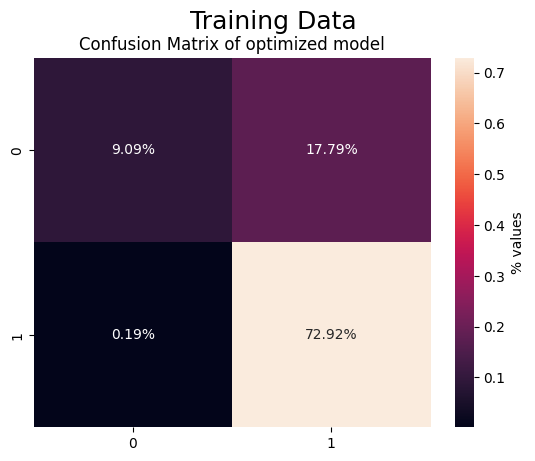

In [19]:
# confusion-matrix of optimized model
sns.heatmap(confusion_matrix(encY,y_pred,normalize='all'),
            annot=True,cbar_kws={'label':'% values'},fmt='.2%')
plt.title('Confusion Matrix of optimized model')
plt.suptitle('Training Data',fontsize=18)
plt.show()

In [20]:
print(classification_report(encY,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.34      0.50       139
           1       0.80      1.00      0.89       378

    accuracy                           0.82       517
   macro avg       0.89      0.67      0.70       517
weighted avg       0.85      0.82      0.79       517



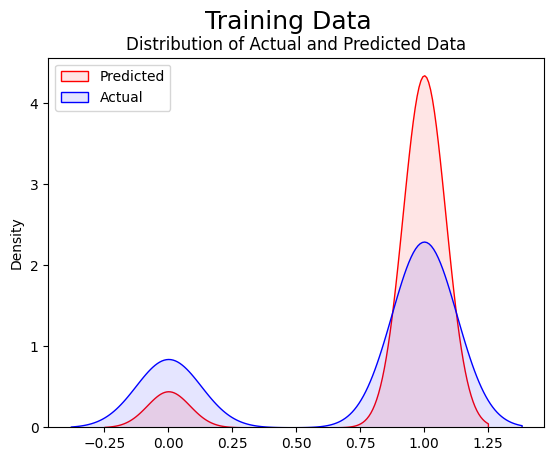

In [21]:
p = sns.distplot(y_pred,hist=False,color='red',
                 kde_kws={'shade':True,'alpha':0.1})
a = sns.distplot(encY.values.ravel(),hist=False,color='blue',
                 kde_kws={'shade':True,'alpha':0.1})
plt.legend(['Predicted','Actual'],loc='upper left')
plt.title('Distribution of Actual and Predicted Data')
plt.suptitle('Training Data',fontsize=18)
plt.show()

In [22]:
# Predict Burned area using Support Vector Machine
data.iloc[:,:10].join(pd.DataFrame(y_pred,
                    columns=['Predicted size']).replace({1:'small',0:'large'}))

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Predicted size
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,small
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,small
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


## Support Vector Machine predicts burned area of forest fires with F1 score of 79 %